In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob as gl
import natsort as ns

In [3]:
numprocx = 1 # 15
numprocy = 15 # 1  

Nxlocal = 501 #35
Nylocal = 35 # 501

Nxglobal = Nxlocal * numprocx
Nyglobal = Nylocal * numprocy

dx = 0.2
dy = 0.2

xmax = ( Nxglobal -1 ) * 0.5 * dx
ymax = ( Nyglobal -1 ) * 0.5 * dy

In [4]:
x_ax = linspace(-xmax,xmax,Nxglobal,endpoint=True)
y_ax = linspace(-ymax,ymax,Nyglobal,endpoint=True)

Y, X = meshgrid(x_ax,y_ax)

In [5]:
modepaths = gl.glob('field_dist/mode_no.0.*')
numprocs = len(modepaths)
modepaths = ns.natsorted(modepaths)
print(modepaths)

['field_dist/mode_no.0.wavelength.0.800000.0.dat', 'field_dist/mode_no.0.wavelength.0.800000.1.dat', 'field_dist/mode_no.0.wavelength.0.800000.2.dat', 'field_dist/mode_no.0.wavelength.0.800000.3.dat', 'field_dist/mode_no.0.wavelength.0.800000.4.dat', 'field_dist/mode_no.0.wavelength.0.800000.5.dat', 'field_dist/mode_no.0.wavelength.0.800000.6.dat', 'field_dist/mode_no.0.wavelength.0.800000.7.dat', 'field_dist/mode_no.0.wavelength.0.800000.8.dat', 'field_dist/mode_no.0.wavelength.0.800000.9.dat', 'field_dist/mode_no.0.wavelength.0.800000.10.dat', 'field_dist/mode_no.0.wavelength.0.800000.11.dat', 'field_dist/mode_no.0.wavelength.0.800000.12.dat', 'field_dist/mode_no.0.wavelength.0.800000.13.dat', 'field_dist/mode_no.0.wavelength.0.800000.14.dat']


In [6]:
mode = zeros((Nyglobal,Nxglobal))
local = zeros((Nylocal,Nxlocal))
iproc = -1
for iprocx in range(numprocx):
    for iprocy in range(numprocy):
        iproc += 1
        modelocal = loadtxt(modepaths[iproc])
        local_re = reshape(modelocal[:,0],(Nylocal,Nxlocal))
        local_im = reshape(modelocal[:,1],(Nylocal,Nxlocal))
        for ix in range(Nxlocal):
            for iy in range(Nylocal):
                ixx = iprocx * Nxlocal + ix
                iyy = iprocy * Nylocal + iy
                mode[iyy,ixx] = local_re[iy, ix]**2 + local_im[iy,ix]**2

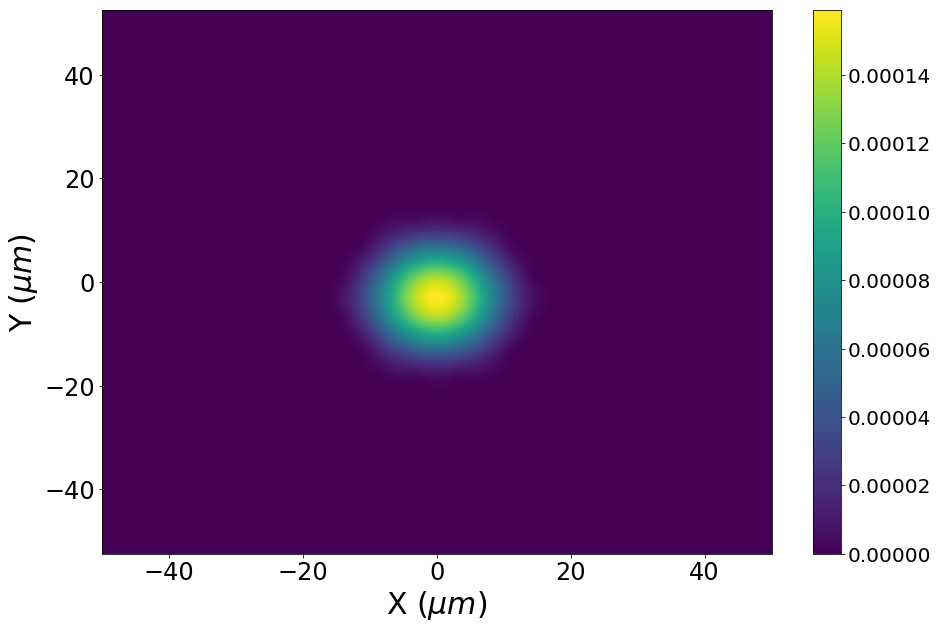

In [7]:
figure(figsize=(15,10))
#pcolormesh(Y,X,log10(mode),vmin=-6,vmax=0)
pcolormesh(Y,X,mode)

tick_params(labelsize=24)
xlabel("X ($\mu m$)",fontsize=30)
ylabel("Y ($\mu m$)",fontsize=30)
cbar = colorbar()
cbar.ax.tick_params(labelsize=20) 

savefig("mode0.png")

#### Profiles

In [8]:
prof_paths = gl.glob('field_dist/fiber_profile.*')
numprocs = len(prof_paths)
prof_paths = ns.natsorted(prof_paths)
print(prof_paths)

['field_dist/fiber_profile.n0.1.821432.0.dat', 'field_dist/fiber_profile.n0.1.821432.1.dat', 'field_dist/fiber_profile.n0.1.821432.2.dat', 'field_dist/fiber_profile.n0.1.821432.3.dat', 'field_dist/fiber_profile.n0.1.821432.4.dat', 'field_dist/fiber_profile.n0.1.821432.5.dat', 'field_dist/fiber_profile.n0.1.821432.6.dat', 'field_dist/fiber_profile.n0.1.821432.7.dat', 'field_dist/fiber_profile.n0.1.821432.8.dat', 'field_dist/fiber_profile.n0.1.821432.9.dat', 'field_dist/fiber_profile.n0.1.821432.10.dat', 'field_dist/fiber_profile.n0.1.821432.11.dat', 'field_dist/fiber_profile.n0.1.821432.12.dat', 'field_dist/fiber_profile.n0.1.821432.13.dat', 'field_dist/fiber_profile.n0.1.821432.14.dat']


In [9]:
prof = zeros((Nyglobal,Nxglobal))
local = zeros((Nylocal,Nxlocal))
iproc = -1
for iprocx in range(numprocx):
    for iprocy in range(numprocy):
        iproc += 1
        proflocal = loadtxt(prof_paths[iproc])
        local = reshape(proflocal,(Nylocal,Nxlocal))
        for ix in range(Nxlocal):
            for iy in range(Nylocal):
                ixx = iprocx * Nxlocal + ix
                iyy = iprocy * Nylocal + iy
                prof[iyy,ixx] = local[iy, ix]

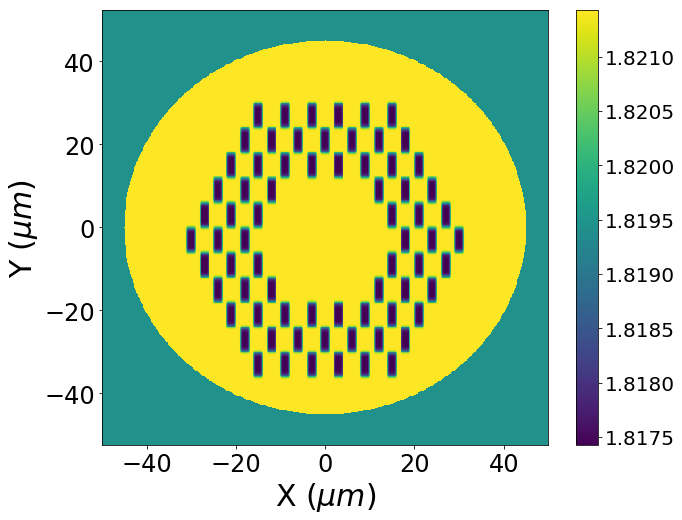

In [10]:
figure(figsize=(10,8))
#pcolormesh(Y,X,log10(prof),vmin=-8,vmax=0)
pcolormesh(Y,X,prof)
#pcolormesh(Y,X,prof,vmin=1.45,vmax=1.5)
tick_params(labelsize=24)
xlabel("X ($\mu m$)",fontsize=30)
ylabel("Y ($\mu m$)",fontsize=30)
cbar = colorbar()
cbar.set_ticks(arange(1.8,1.823,0.0005))
cbar.ax.tick_params(labelsize=20) 

savefig("profile.png")

In [26]:
indx = unravel_index(argmax(mode),mode.shape)

In [30]:
print("Maximum on mode 0: ",mode[indx])
mode[indx]==mode.max()

Maximum on mode 0:  0.000158980016416


True

In [47]:
mode.max()/2

7.9490008208249984e-05

In [32]:
where(min(abs(mode[:,250]-mode.max()*0.5)))

(array([0]),)

In [55]:
indx_x1 = argmin(abs((mode[:,250]-mode.max()*0.5)))
indx_y1 = argmin(abs((mode[247,:]-mode.max()*0.5)))

In [56]:
indx_x2 = indx[0] + indx_x1
indx_y2 = indx[1] + indx_y1

In [60]:
width_x = x_ax[indx_x2]-x_ax[indx_x1]
width_y = x_ax[indx_x2]-x_ax[indx_x1]

print("Width in x: ",width_x)
print("Width in y: ",width_y)

Width in x:  49.4
Width in y:  49.4
